<a href="https://colab.research.google.com/github/EsraCesur4/NecklineClassifier/blob/main/CNN_MODEL_for_Neckline_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import os
from os.path import isfile, join
from os import listdir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

IMAGE_SIZE = [224, 224]

training_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.0,
                                    zoom_range=0.0,
                                    horizontal_flip=False,
                                    preprocessing_function=preprocess_input,
                                    validation_split=0.2
                                    )

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input, validation_split=0.2)

training_generator = training_datagen.flow_from_directory("/content/drive/MyDrive/your_folder", target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical',subset='training', shuffle=True)
validation_generator = validation_datagen.flow_from_directory("/content/drive/MyDrive/your_folder", target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'categorical',subset='validation', shuffle=True)

Found 3072 images belonging to 3 classes.
Found 766 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

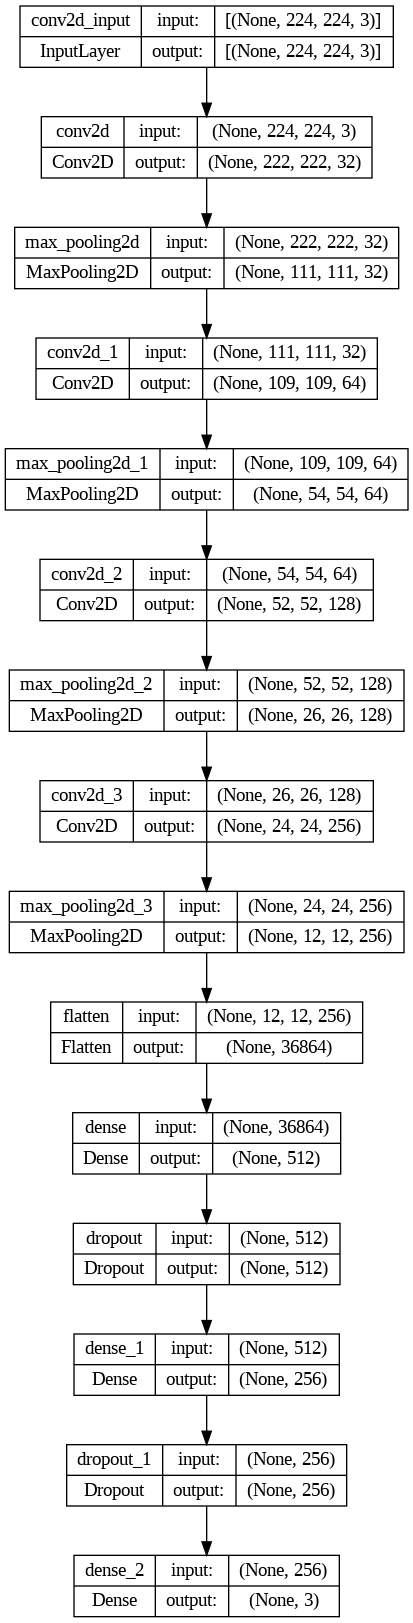

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,

           to_file='keras_model_plot.png',

           show_shapes=True,

           show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // 32,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/5
96/96 [==============================] - 1209s 12s/step - loss: 1.1200 - accuracy: 0.3376 - val_loss: 1.1000 - val_accuracy: 0.3166
Epoch 2/5
96/96 [==============================] - 14s 148ms/step - loss: 1.0995 - accuracy: 0.3333 - val_loss: 1.0984 - val_accuracy: 0.3668
Epoch 3/5
96/96 [==============================] - 14s 143ms/step - loss: 1.0782 - accuracy: 0.3955 - val_loss: 1.0520 - val_accuracy: 0.4701
Epoch 4/5
96/96 [==============================] - 14s 149ms/step - loss: 0.9949 - accuracy: 0.4935 - val_loss: 0.9827 - val_accuracy: 0.4823
Epoch 5/5
96/96 [==============================] - 14s 142ms/step - loss: 0.9184 - accuracy: 0.5586 - val_loss: 0.9545 - val_accuracy: 0.5245


In [ ]:
model.save('/content/drive/MyDrive/CNN_Neckline_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


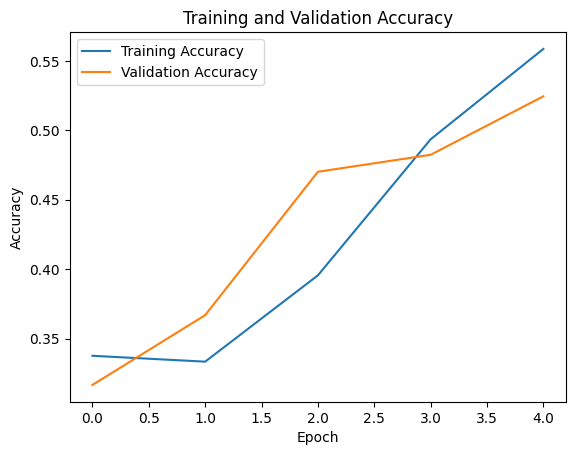

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

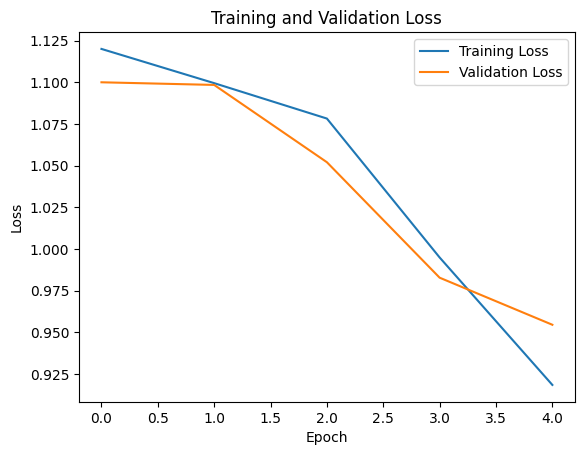

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

24/24 [==============================] - 7s 295ms/step


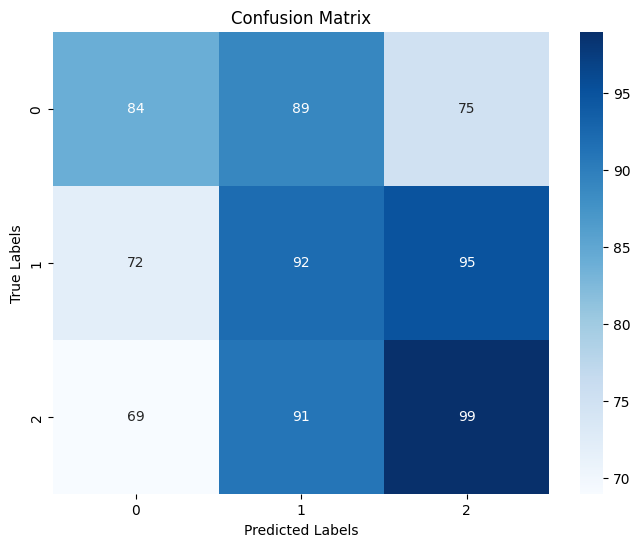


Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.34      0.36       248
           1       0.34      0.36      0.35       259
           2       0.37      0.38      0.37       259

    accuracy                           0.36       766
   macro avg       0.36      0.36      0.36       766
weighted avg       0.36      0.36      0.36       766



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_true = validation_generator.classes
y_pred_probabilities = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path1 = '/content/drive/MyDrive/IMG_4951.webp'
img = image.load_img(img_path1, target_size=(224, 224))
img_array1 = image.img_to_array(img)
img_array1 = np.expand_dims(img_array1, axis=0)

img_path2 = '/content/drive/MyDrive/4889_2.jpg'
img = image.load_img(img_path2, target_size=(224, 224))
img_array2 = image.img_to_array(img)
img_array2 = np.expand_dims(img_array2, axis=0)

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import os
from os.path import isfile, join
from os import listdir
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 423ms/step
1: round - Probability: 0.0
2: scoop - Probability: 1.1326357707730494e-05
3: v-neck - Probability: 0.9999886751174927
Predicted Class: v-neck
Probability: 0.9999886751174927


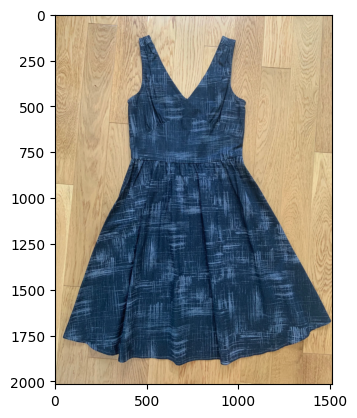

In [ ]:
image1 = cv2.imread(img_path1)
image_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb1)

class_labels = ["round", "scoop", "v-neck"]

predictions = model.predict(img_array1)
for i in range(3):
    print(f"{i + 1}: {class_labels[i]} - Probability: {predictions[0][i]}")
max_class_index = np.argmax(predictions)
max_class_label = class_labels[max_class_index]
max_probability = predictions[0][max_class_index]
print(f"Predicted Class: {max_class_label}")
print(f"Probability: {max_probability}")

1/1 [==============================] - 0s 20ms/step
1: round - Probability: 0.0
2: scoop - Probability: 1.0
3: v-neck - Probability: 8.566639064788717e-10
Predicted Class: scoop
Probability: 1.0


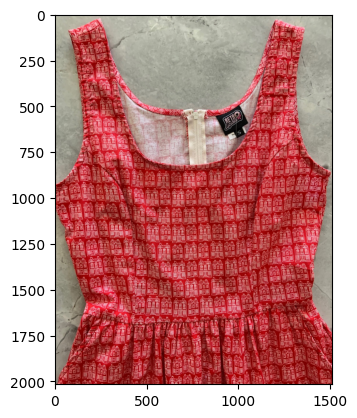

In [ ]:
image2 = cv2.imread(img_path2)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb2)

predictions = model.predict(img_array2)
for i in range(3):
    print(f"{i + 1}: {class_labels[i]} - Probability: {predictions[0][i]}")
max_class_index = np.argmax(predictions)
max_class_label = class_labels[max_class_index]
max_probability = predictions[0][max_class_index]
print(f"Predicted Class: {max_class_label}")
print(f"Probability: {max_probability}")